In [54]:
from custom_gen import StyleGANGenerator
from tqdm import tqdm

import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [42]:
_stylegan_ffhq_f_gdrive_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl'

_image_size = (178, 218)
_img_dir = 'img/to_label2/'

_batch_size = 16
_n_batch = 16000

In [43]:
rnd = np.random.RandomState()
gen = StyleGANGenerator(_stylegan_ffhq_f_gdrive_url)

In [44]:
z_list = []

for i in tqdm(range(_n_batch)):
    latents = rnd.randn(_batch_size, *gen.Gs.input_shape[1:])
    z_list.append(latents)
    
    imgs = gen.get_images(latents)
    imgs = np.asarray([cv2.resize(img, dsize=_image_size, interpolation=cv2.INTER_LANCZOS4) for img in imgs])
    
    for j, img in enumerate(imgs):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(_img_dir + 'img-' + str(i*_batch_size+j) + '.png', img)

100%|██████████| 16000/16000 [3:31:55<00:00,  1.26it/s]  


In [47]:
z_concat = np.concatenate(z_list, axis=0)

In [49]:
z_concat.shape

(256000, 512)

In [52]:
with h5py.File('sample_z2.h5', 'w') as f:
    f.create_dataset('z', data=z_concat)

In [53]:
with h5py.File('sample_z2.h5', 'r') as f:
    z = f['z'][:]

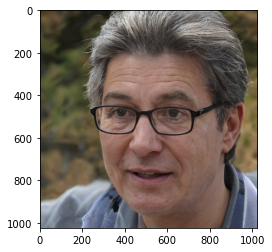

In [57]:
img = gen.get_images(np.reshape(z[44], (1,512)))
plt.imshow(img[0]/255)